In [1]:
import sys
import os
sys.path.append("address_score")

#### Address Score Calculation

In [2]:
# Get the Greater Vancouver network map cache
from network_cache import cache_greater_vancouver_network

graph_path = "greater_vancouver.graphml"

if not os.path.exists(graph_path):
    print("Graph file not found. Generating it now...")
    cache_greater_vancouver_network(graph_path)
else:
    print("Graph file already exists. Skipping download.")

Graph file not found. Generating it now...
Graph saved to greater_vancouver.graphml


In [3]:
# Calculating the road distances from desired addresses to houses
from compute_distances import compute_road_distances
# Desired addresses for scoring. This example uses the location of Northeastern University's Vancouver campus.
start_coords = (49.28069261104817, -123.11572527879807)
house_with_distances = compute_road_distances(start_coords,house_csv_path="get_neighborhoods/houses_with_neighborhoods.csv")

Loading Vancouver road network...
Running fast Dijkstra (single-source)...


In [4]:
# Calculating the address scores based on the distances
from get_address_score import get_address_score
house_with_scores = get_address_score(house_with_distances)

address_scores_result = house_with_scores.sort_values(
    by="Address_Scores", ascending=False)
columns_to_keep = [
    "Address",  "Neighborhood",
    "Driving_Distance_m", "Address_Scores"
]
address_scores_result[columns_to_keep].head(5)

,Address,Neighborhood,Driving_Distance_m,Address_Scores
982,416-418 UNION STREET,Strathcona,1660.573,100.000000
961,521 UNION STREET,Strathcona,1801.436,98.506788
492,993 BROUGHTON STREET,West End,1833.577,98.166079
1107,518 KEEFER STREET,Strathcona,1838.956,98.109059
1006,601 E PENDER STREET,Strathcona,1891.673,97.550235


#### Safety Score Calculation

In [5]:
sys.path.append("safety_score")
from safety_score import get_safety_score_data

In [6]:
safety_score_data = get_safety_score_data()
safety_score_data.head(10)

,Neighborhood,Weighted Crime Rate,Min-max Normalized Score,Z-score Normalized Score
Arbutus Ridge,Arbutus Ridge,5384.301982,98,60
Downtown,Downtown,40066.182927,36,15
Dunbar-Southlands,Dunbar-Southlands,4241.601806,100,61
Fairview,Fairview,11764.399879,87,51
Grandview-Woodland,Grandview-Woodland,14814.216426,81,48
Hastings-Sunrise,Hastings-Sunrise,7859.357174,94,57
Kensington-Cedar Cottage,Kensington-Cedar Cottage,7901.428801,93,56
Kerrisdale,Kerrisdale,8732.702406,92,55
Killarney,Killarney,5296.321816,98,60
Kitsilano,Kitsilano,7210.095621,95,57


In [7]:
house_with_scores["Min-max Normalized Score"] = house_with_scores["Neighborhood"].map(safety_score_data.set_index("Neighborhood")["Min-max Normalized Score"])
house_with_scores["Z-score Normalized Score"] = house_with_scores["Neighborhood"].map(safety_score_data.set_index("Neighborhood")["Z-score Normalized Score"])

house_with_scores.head(10)

,Number,Address,List Date,Price,Days on market,Total floor area,Year Built,Age,Lot Size,Latitude,Longitude,geometry,Neighborhood,Driving_Distance_m,Address_Scores,Min-max Normalized Score,Z-score Normalized Score
0,1,3178 GRAVELEY STREET,5/8/2020,1500000,18,2447,1946,74,5674.00,49.270200,-123.037009,POINT (-123.0370093 49.2702),Hastings-Sunrise,6472.199,48.994579,94,57
1,2,1438 E 28TH AVENUE,1/22/2020,1300000,7,2146,1982,38,3631.98,49.245161,-123.074991,POINT (-123.0749913 49.24516130000001),Kensington-Cedar Cottage,5827.355,55.830218,93,56
2,3,2831 W 49TH AVENUE,6/18/2019,2650000,1,3108,1929,90,9111.00,49.227603,-123.168387,POINT (-123.1683866 49.2276034),Kerrisdale,8778.311,24.548744,92,55
3,4,2645 TRIUMPH STREET,6/18/2019,1385000,28,2602,1922,97,4022.70,49.284068,-123.050868,POINT (-123.0508676 49.28406769999999),Hastings-Sunrise,4942.987,65.204921,94,57
4,5,741-743 E 10TH AVENUE,11/28/2019,1590000,17,1843,1970,49,4026.00,49.261739,-123.088100,POINT (-123.0880999 49.2617389),Mount Pleasant,3754.067,77.808013,82,48
5,6,86 W 21ST AVENUE,3/3/2020,2565000,7,2439,1989,31,4026.00,49.251692,-123.106888,POINT (-123.106888 49.251692),Riley Park,4039.338,74.784010,94,57
6,7,2418 E 54TH AVENUE,8/12/2019,1303000,9,2100,1979,40,3298.48,49.219959,-123.057572,POINT (-123.0575719 49.21995889999999),Victoria-Fraserview,9189.300,20.192074,98,60
7,8,1787 E 57TH AVENUE,6/13/2019,1150000,10,1900,1950,69,6574.82,49.218401,-123.071107,POINT (-123.0711074 49.2184006),Victoria-Fraserview,9029.029,21.891019,98,60
8,9,2926 TRIMBLE STREET,8/16/2019,2500000,10,2133,2005,14,3360.00,49.260835,-123.205894,POINT (-123.2058942 49.2608353),West Point Grey,8164.765,31.052610,97,59
9,10,466 E 60TH AVENUE,10/17/2019,2400000,44,3989,2019,0,4412.00,49.215542,-123.095323,POINT (-123.095323 49.2155419),Sunset,8608.143,26.352602,91,55


#### Price, Total floor area, Year built, Lot size Score Calculation

In [8]:
MIN_PRICE = 1000000
MAX_PRICE = 2500000

# Scoring weights (must sum to 1.0)
WEIGHTS = {
    'address': 0.25,    # Weight for address score
    'price': 0.20,      # Weight for price score
    'area': 0.15,       # Weight for area score
    'year_built': 0.15, # Weight for year built score
    'lot_size': 0.10,   # Weight for lot size score
    'safety': 0.15      # Weight for safety score
}

# ===========================================
# Price Score Calculation
# ===========================================

# Filter properties outside price range
price_filtered = house_with_scores[
    (house_with_scores['Price'] >= MIN_PRICE) & 
    (house_with_scores['Price'] <= MAX_PRICE)
].copy()

# Calculate price score
price_filtered['Price_Score'] = 100 * (MAX_PRICE - price_filtered['Price']) / (MAX_PRICE - MIN_PRICE)

# Handle division by zero (when price range is zero)
if MAX_PRICE == MIN_PRICE:
    price_filtered['Price_Score'] = 50

# ===========================================
# Area Score Calculation
# ===========================================

# Calculate min and max area
min_area = price_filtered['Total floor area'].min()
max_area = price_filtered['Total floor area'].max()

# Calculate area score
if max_area == min_area:
    price_filtered['Area_Score'] = 50
else:
    price_filtered['Area_Score'] = 100 * (
        price_filtered['Total floor area'] - min_area) / (max_area - min_area)

# ===========================================
# Year Built Score Calculation
# ===========================================

# Calculate oldest and newest construction years
oldest_year = price_filtered['Year Built'].min()
newest_year = price_filtered['Year Built'].max()

# Calculate year built score
if newest_year == oldest_year:
    price_filtered['Year_Built_Score'] = 50
else:
    price_filtered['Year_Built_Score'] = 100 * (
        price_filtered['Year Built'] - oldest_year) / (newest_year - oldest_year)

# ===========================================
# Lot Size Score Calculation
# ===========================================

# Calculate min and max lot size
min_lot = price_filtered['Lot Size'].min()
max_lot = price_filtered['Lot Size'].max()

# Calculate lot size score
if max_lot == min_lot:
    price_filtered['Lot_Size_Score'] = 50
else:
    price_filtered['Lot_Size_Score'] = 100 * (
        price_filtered['Lot Size'] - min_lot) / (max_lot - min_lot)

#### Composite Score Calculation

In [9]:

# Validate weights sum to 1.0
total_weight = sum(WEIGHTS.values())
if abs(total_weight - 1.0) > 0.001:
    raise ValueError(f"Sum of weights must be 1.0 (current: {total_weight})")

# Calculate composite score
price_filtered['Total_Score'] = (
    WEIGHTS['address'] * price_filtered['Address_Scores'] +
    WEIGHTS['price'] * price_filtered['Price_Score'] +
    WEIGHTS['area'] * price_filtered['Area_Score'] +
    WEIGHTS['year_built'] * price_filtered['Year_Built_Score'] +
    WEIGHTS['lot_size'] * price_filtered['Lot_Size_Score'] +
    WEIGHTS['safety'] * price_filtered['Min-max Normalized Score']
)

# Sort by composite score
final_scored_houses = price_filtered.sort_values('Total_Score', ascending=False)

#### Results Display

In [10]:
# Display top 10 properties
print("="*80)
print(f"TOP 10 PROPERTY RECOMMENDATIONS (Price Range: ${MIN_PRICE:,}-${MAX_PRICE:,})")
print("="*80)
display_columns = [
    'Address', 'Neighborhood', 'Price', 
    'Total floor area', 'Year Built', 'Lot Size',
    'Address_Scores', 'Price_Score', 'Area_Score',
    'Year_Built_Score', 'Lot_Size_Score', 
    'Min-max Normalized Score', 'Total_Score'
]

# Format display
formatted_display = final_scored_houses[display_columns].head(10).copy()
formatted_display['Price'] = formatted_display['Price'].apply(lambda x: f"${x:,.0f}")
formatted_display['Total floor area'] = formatted_display['Total floor area'].apply(lambda x: f"{x:,.0f} sqft")
formatted_display['Lot Size'] = formatted_display['Lot Size'].apply(lambda x: f"{x:,.0f} sqft")

# Round scores to 1 decimal
for col in ['Address_Scores', 'Price_Score', 'Area_Score', 
            'Year_Built_Score', 'Lot_Size_Score', 'Min-max Normalized Score', 'Total_Score']:
    formatted_display[col] = formatted_display[col].round(1)

display(formatted_display)

TOP 10 PROPERTY RECOMMENDATIONS (Price Range: $1,000,000-$2,500,000)


,Address,Neighborhood,Price,Total floor area,Year Built,Lot Size,Address_Scores,Price_Score,Area_Score,Year_Built_Score,Lot_Size_Score,Min-max Normalized Score,Total_Score
867,1404 PARKER STREET,Grandview-Woodland,"$1,350,000","2,324 sqft",2005,"2,542 sqft",84.7,76.7,38.1,88.0,11.9,81,68.8
1147,450 SALSBURY DRIVE,Grandview-Woodland,"$1,310,000","2,364 sqft",2010,"1,762 sqft",78.9,79.3,38.8,92.0,4.4,81,67.8
1259,1144 E 21ST AVENUE,Kensington-Cedar Cottage,"$1,250,000","2,250 sqft",1993,"4,026 sqft",67.1,83.3,36.7,78.4,26.2,93,67.3
173,3266 E PENDER STREET,Hastings-Sunrise,"$1,300,000","2,498 sqft",2007,"5,425 sqft",51.6,80.0,41.3,89.6,39.7,94,66.6
620,506 PENTICTON STREET,Hastings-Sunrise,"$1,666,000","3,563 sqft",1992,"5,445 sqft",65.7,55.6,61.4,77.6,39.9,94,66.5
1152,827 E 18TH AVENUE,Kensington-Cedar Cottage,"$1,388,000","1,826 sqft",2007,"2,494 sqft",73.3,74.1,28.7,89.6,11.5,93,66.0
651,4212 WINDSOR STREET,Kensington-Cedar Cottage,"$1,165,000","2,120 sqft",1989,"3,482 sqft",62.9,89.0,34.2,75.2,21.0,93,66.0
386,460 E KING EDWARD AVENUE,Riley Park,"$1,325,000","1,792 sqft",1996,"3,200 sqft",69.1,78.3,28.1,80.8,18.3,94,65.2
504,408 E KING EDWARD AVENUE,Riley Park,"$1,350,000","2,182 sqft",1984,"3,623 sqft",70.2,76.7,35.4,71.2,22.3,94,65.2
1172,2476 E 6TH AVENUE,Hastings-Sunrise,"$1,638,000","3,586 sqft",1982,"6,039 sqft",58.8,57.5,61.8,69.6,45.6,94,64.6


#### Visualization Analysis


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\shiyu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


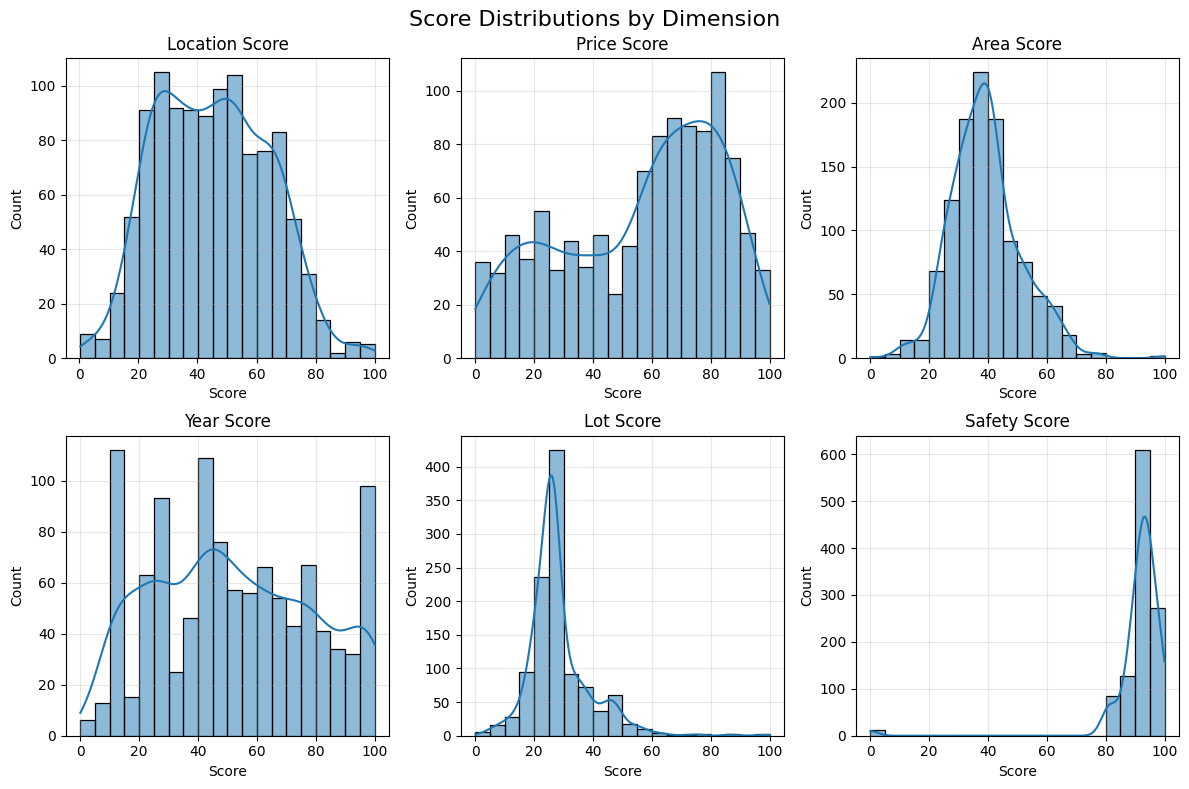

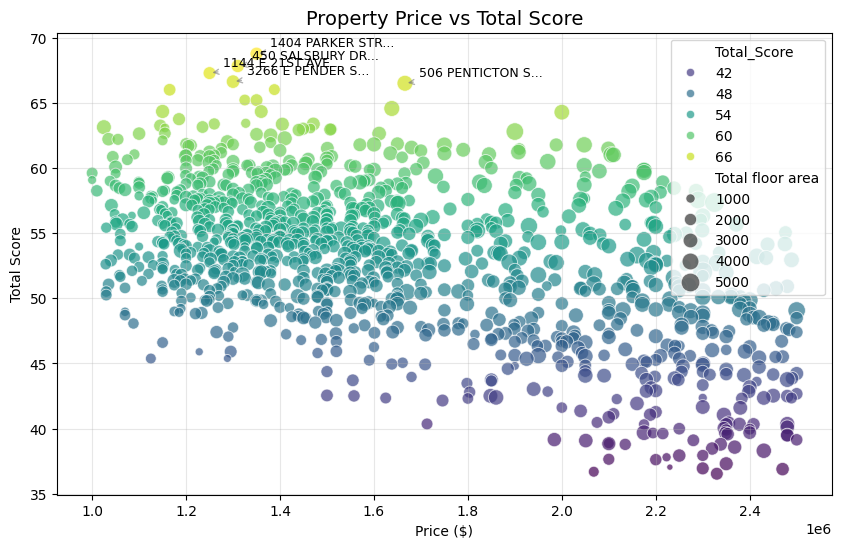

C:\Users\shiyu\AppData\Local\Temp\ipykernel_38896\3170823261.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


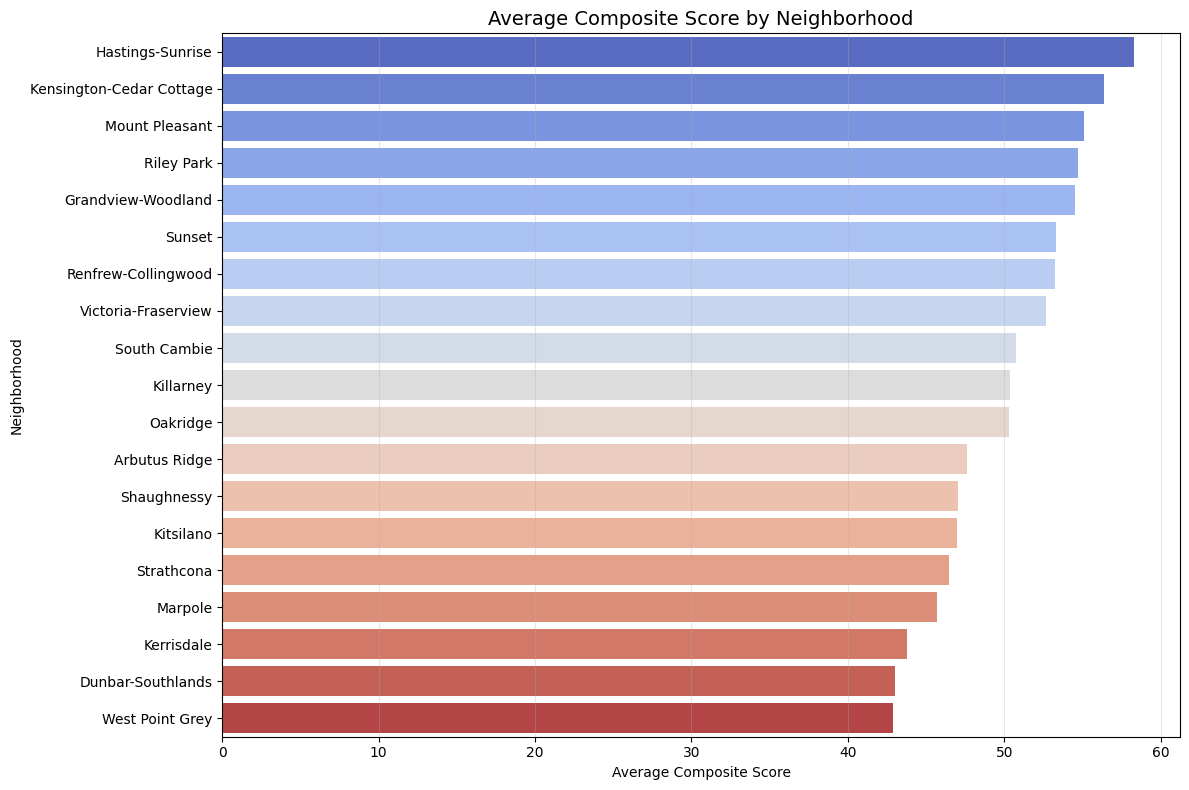

In [12]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Score distributions by dimension
plt.figure(figsize=(12, 8))
score_cols = ['Address_Scores', 'Price_Score', 'Area_Score', 
             'Year_Built_Score', 'Lot_Size_Score', 'Min-max Normalized Score']
score_names = ['Location Score', 'Price Score', 'Area Score', 
               'Year Score', 'Lot Score', 'Safety Score']

for i, col in enumerate(score_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(final_scored_houses[col], bins=20, kde=True)
    plt.title(score_names[i])
    plt.xlabel('Score')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Score Distributions by Dimension', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# 2. Price vs Total Score relationship
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='Price', 
    y='Total_Score', 
    data=final_scored_houses,
    hue='Total_Score',
    palette='viridis',
    size='Total floor area',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Property Price vs Total Score', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Total Score')
plt.grid(True, alpha=0.3)

# Annotate top 5 properties
top_5 = final_scored_houses.head(5)
for i, row in top_5.iterrows():
    plt.annotate(
        f"{row['Address'][:15]}...", 
        xy=(row['Price'], row['Total_Score']),
        xytext=(10, 5),
        textcoords='offset points',
        fontsize=9,
        arrowprops=dict(arrowstyle="->", color='gray', alpha=0.6)
    )

plt.show()

# 3. Average score by neighborhood
plt.figure(figsize=(12, 8))
neighborhood_scores = final_scored_houses.groupby('Neighborhood')['Total_Score'].mean().sort_values(ascending=False)
sns.barplot(
    x=neighborhood_scores.values,
    y=neighborhood_scores.index,
    palette='coolwarm'
)
plt.title('Average Composite Score by Neighborhood', fontsize=14)
plt.xlabel('Average Composite Score')
plt.ylabel('Neighborhood')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()